# ***1 - IMPORTS :***

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.09 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install dlib imutils
!pip install opencv-python-headless  # Use headless OpenCV to avoid GUI issues in Colab
!pip install numpy
!pip install retinaface_pytorch
!pip install pydub
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

INFO: pip is looking at multiple versions of retinaface-pytorch to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.1 MB/s eta 0:00:00
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8422 sha256=710f843eec71afd5d452cf1b9a12ca0d41e0918249495d2e396535a56e7b6220
  Stored in directory: /root/.cache/pip/wheels/30/a2/1a/3fa89c7bfd9af5d22f774a561ea7d9564b7d7448fe4c9921ca
Successfully built jpeg4py
--2025-01-29 19:52:57--  http://dlib.net/files/shap

In [4]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
from imutils import face_utils
from IPython.display import Audio
import random
from pydub import AudioSegment
from pydub.playback import play
import warnings
warnings.filterwarnings("ignore")
from retinaface.pre_trained_models import get_model

# ***2 - MODEL 1 : CAFFE MODEL***

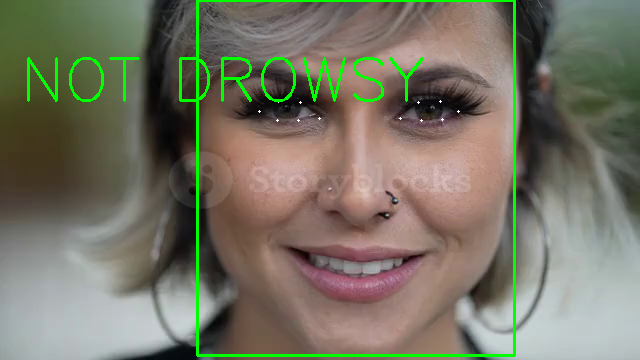

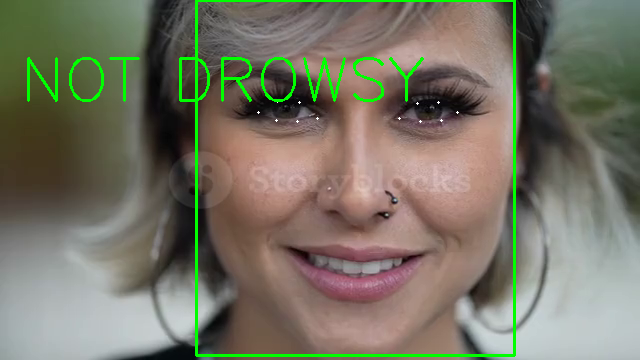

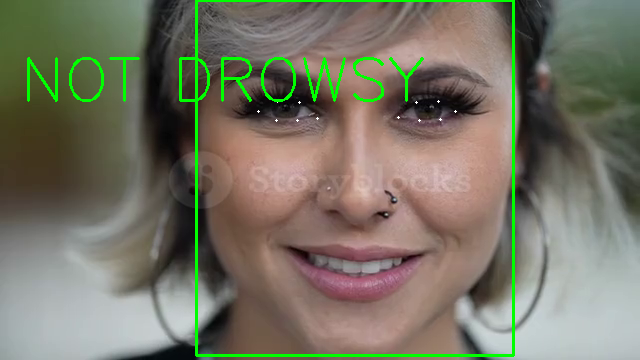

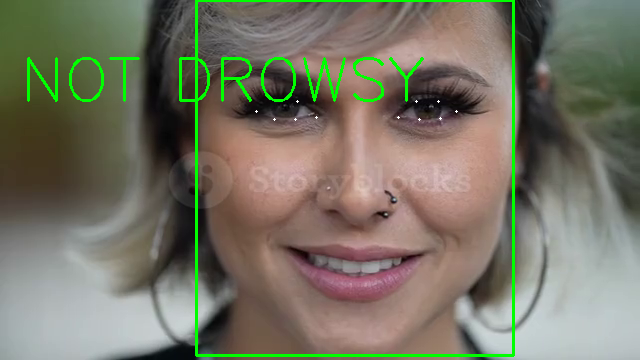

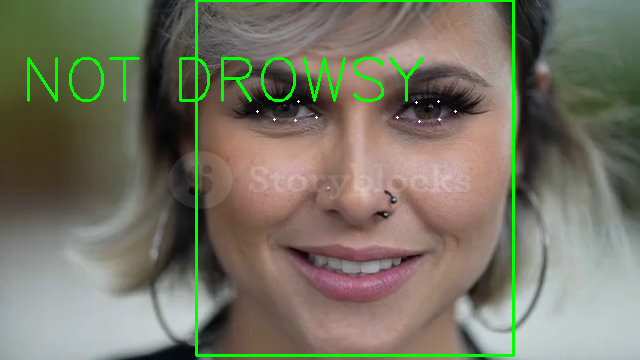

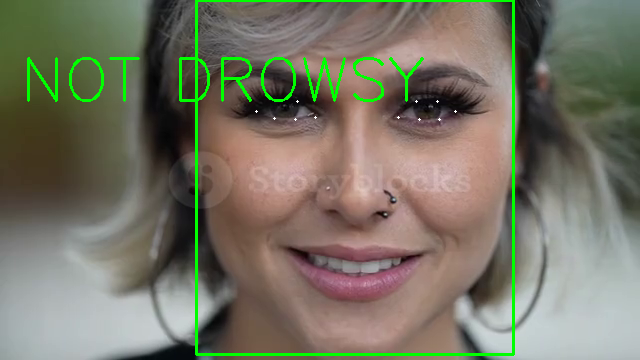

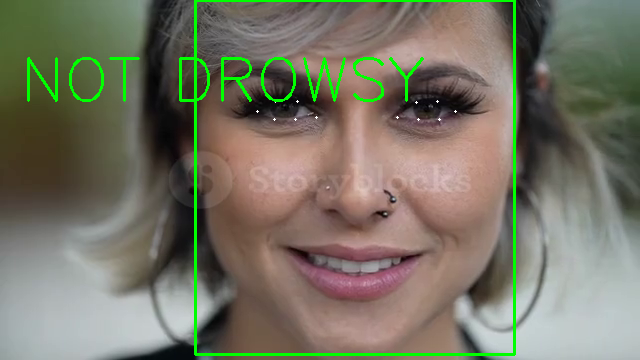

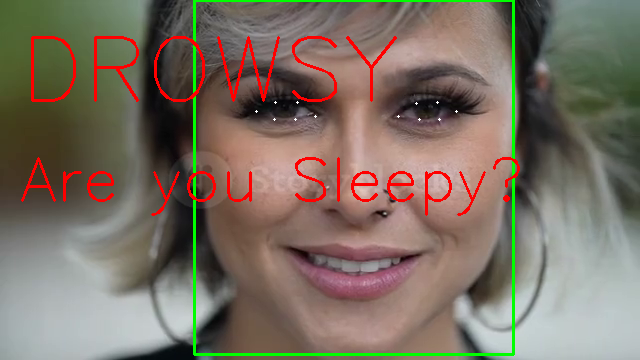

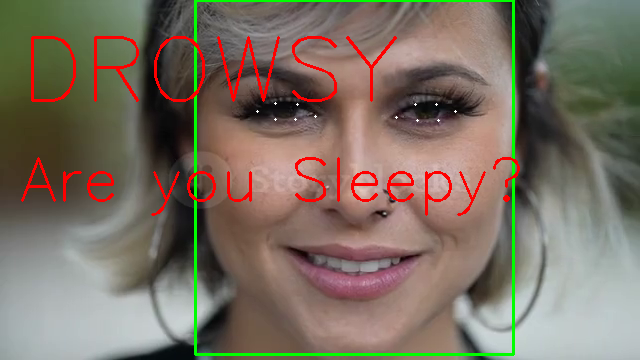

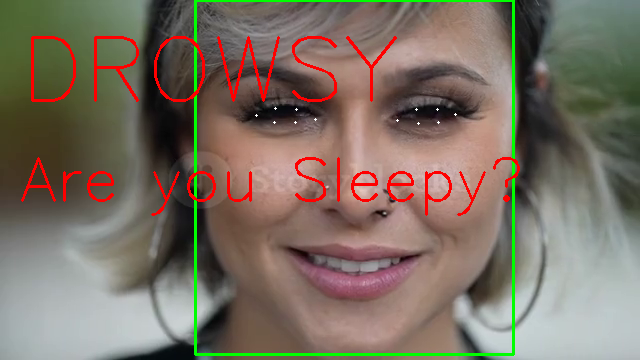

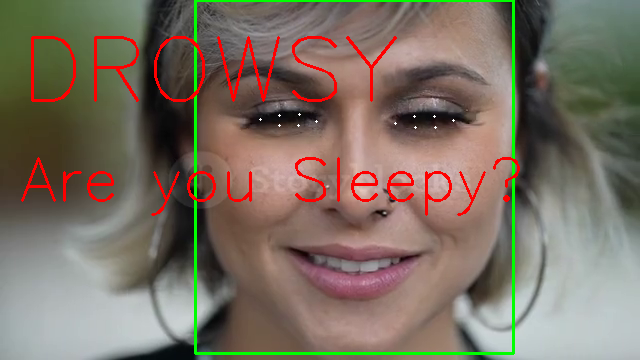

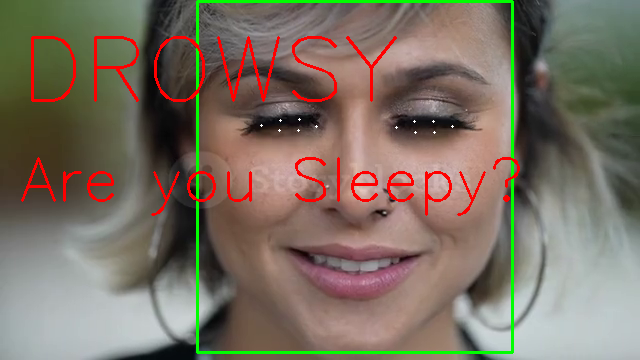

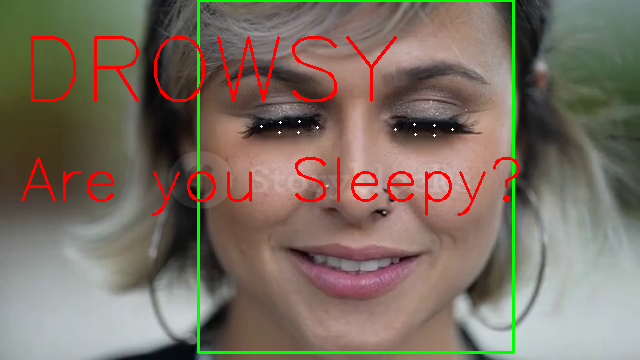

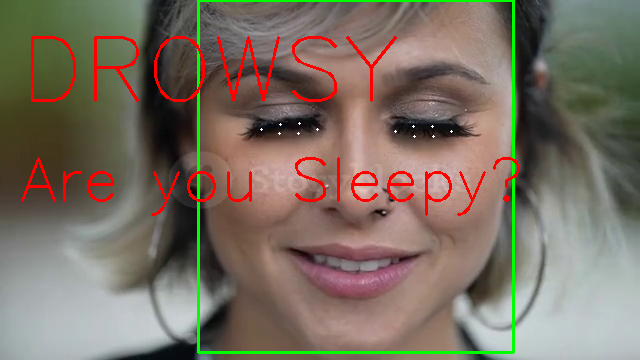

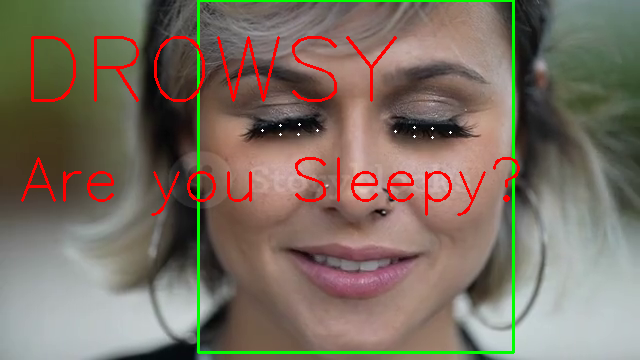

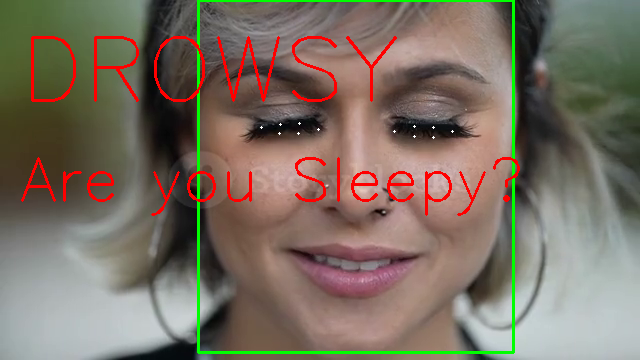

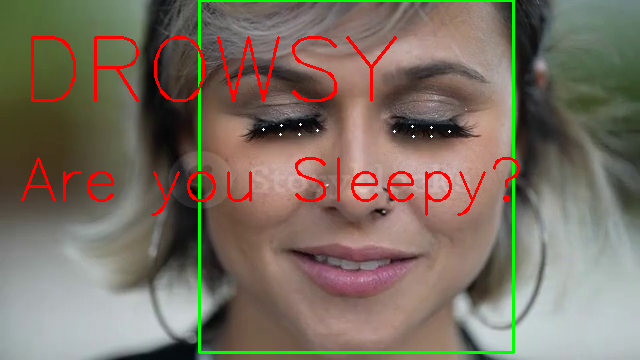

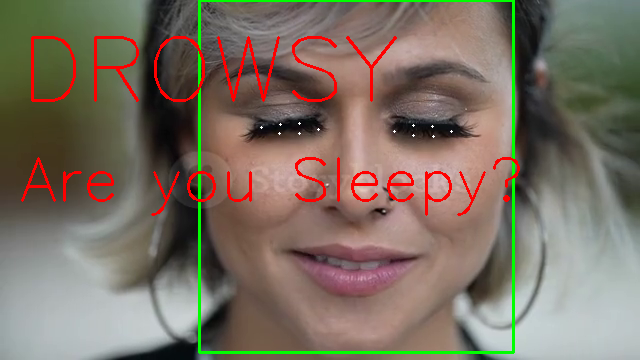

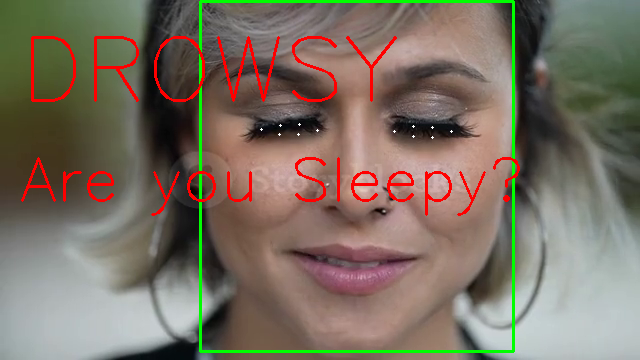

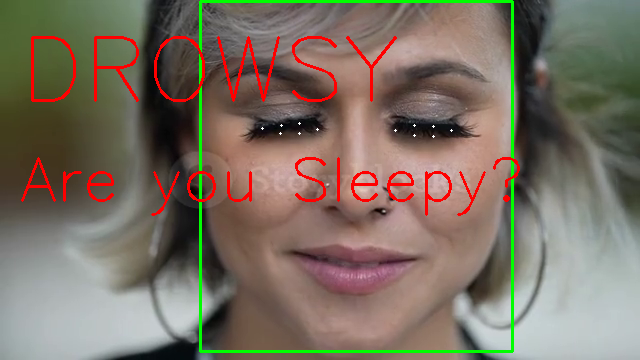

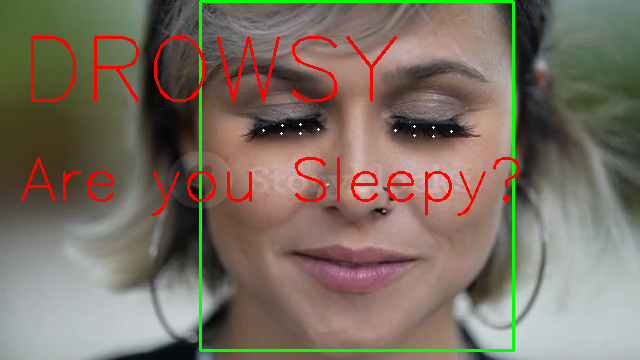

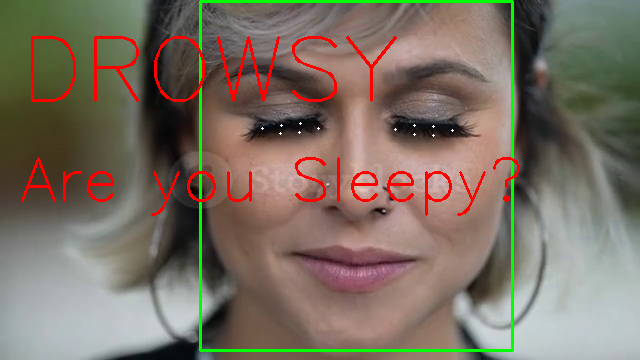

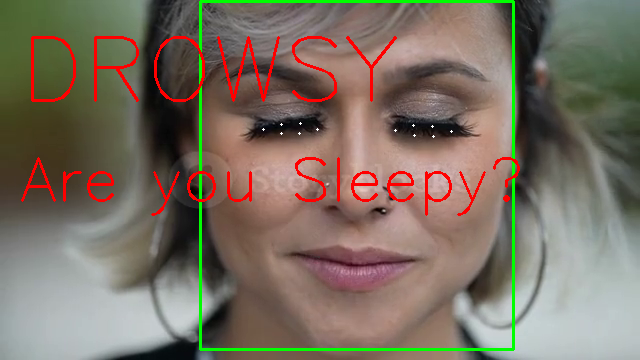

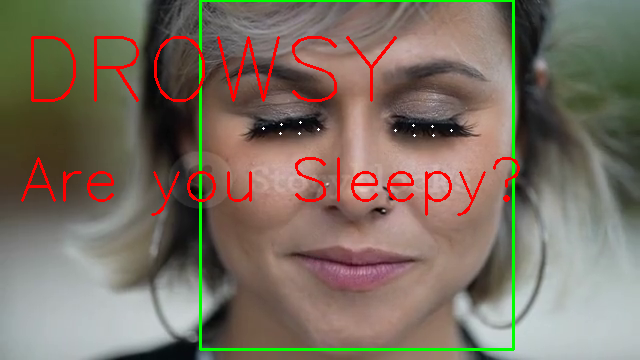

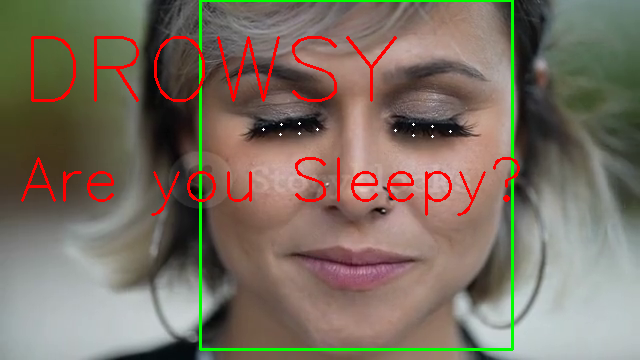

In [7]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance
from pydub import AudioSegment
from pydub.playback import play

# Function to calculate Eye Aspect Ratio (EAR)
def calculate_EAR(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear_aspect_ratio = (A + B) / (2.0 * C)
    return ear_aspect_ratio

def detect_drowsiness_and_draw(image, predictor, net):
    # Preprocess the image for face detection with Caffe
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Detect faces using the Caffe model
    net.setInput(blob)
    detections = net.forward()

    if detections.shape[2] == 0:
        print("No faces detected in the image.")
        return image

    detector = dlib.get_frontal_face_detector()
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # Set your confidence threshold
            # Get the face bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")

            # Draw a rectangle around the detected face
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Convert the bounding box to dlib rectangle
            dlib_rect = dlib.rectangle(x1, y1, x2, y2)

            # Get the landmarks
            shape = predictor(image, dlib_rect)
            shape_np = np.array([[shape.part(j).x, shape.part(j).y] for j in range(68)])

            # Collect left and right eye landmarks
            left_eye = [np.array([shape.part(j).x, shape.part(j).y]) for j in range(36, 42)]
            right_eye = [np.array([shape.part(j).x, shape.part(j).y]) for j in range(42, 48)]

            # Draw the eye landmarks
            for eye_part in left_eye + right_eye:
                cv2.circle(image, (eye_part[0], eye_part[1]), 1, (255, 255, 255), -1)

            # Calculate EAR for both eyes
            left_ear = calculate_EAR(left_eye)
            right_ear = calculate_EAR(right_eye)
            ear = (left_ear + right_ear) / 2

            # Determine if drowsy and annotate the image
            if ear < 0.30:
                cv2.putText(image, "DROWSY", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
                cv2.putText(image, "Are you Sleepy?", (20, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

            else:
                cv2.putText(image, "NOT DROWSY", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

    return image

def main():
    video_path = "/content/Video1.mp4"
    frame_limit = 25  # Set the number of frames to process

    cap = cv2.VideoCapture(video_path)
    net = cv2.dnn.readNetFromCaffe("/content/deploy.prototxt", "/content/res10_300x300_ssd_iter_140000_fp16.caffemodel")
    predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

    frame_count = 0

    while frame_count < frame_limit:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read from the video file or end of video reached.")
            break

        frame = detect_drowsiness_and_draw(frame, predictor, net)
        cv2_imshow(frame)

        frame_count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

# ***3 - MODEL 2 : YOLO PYTORCH***

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-29 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


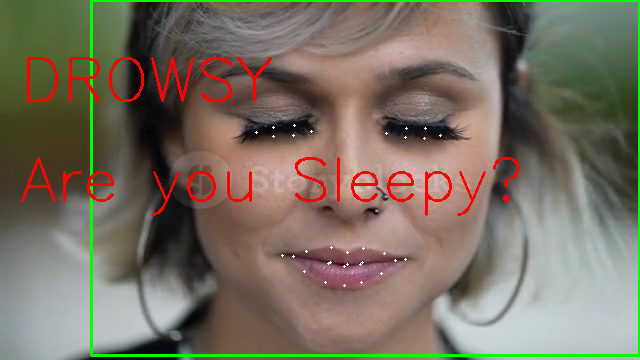

In [9]:
import torch

# Function to calculate the Eye Aspect Ratio (EAR)
def calculate_ear(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Function to calculate the Mouth Opening Distance
def calculate_mouth_opening(mouth):
    # Calculate the distance between the upper and lower lips
    upper_lip = distance.euclidean(mouth[3], mouth[9])
    return upper_lip

# Function to extract a single random frame from a video
def extract_random_frame(video_path):
    vidObj = cv2.VideoCapture(video_path)
    if not vidObj.isOpened():
        print(f"Error: Could not open video file at path: {video_path}")
        return None

    total_frames = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
    random_frame = random.randint(0, total_frames - 1)
    vidObj.set(cv2.CAP_PROP_POS_FRAMES, random_frame)

    success, image = vidObj.read()
    if success and image is not None:
        return image
    else:
        print("Failed to extract a random frame.")
        return None

# Function to detect faces, drowsiness, and mouth opening distance, and draw detection boundaries
def detect_drowsiness_and_draw(image, model, predictor_path, ear_threshold=0.15, mouth_open_threshold=15):
    # Load the dlib shape predictor
    dlib_facelandmark = dlib.shape_predictor(predictor_path)

    # Use YOLO to detect faces
    results = model(image)
    faces = results.pandas().xyxy[0]

    # If no faces detected, return the original image
    if faces.shape[0] == 0:
        print("No faces detected in the image.")
        return image

    # To ensure confidence-based filtering of detections
    for index, row in faces.iterrows():
        if row['name'] == 'person':
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

            # Draw a rectangle around the detected face
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Convert the bounding box to a dlib rectangle for facial landmarks
            dlib_rect = dlib.rectangle(x1, y1, x2, y2)

            # Get the landmarks
            face_landmarks = dlib_facelandmark(image, dlib_rect)

            # Collect left and right eye landmarks
            left_eye = [np.array([face_landmarks.part(n).x, face_landmarks.part(n).y]) for n in range(36, 42)]
            right_eye = [np.array([face_landmarks.part(n).x, face_landmarks.part(n).y]) for n in range(42, 48)]

            # Collect mouth landmarks
            mouth = [np.array([face_landmarks.part(n).x, face_landmarks.part(n).y]) for n in range(48, 68)]

            # Calculate EAR for both eyes
            left_ear = calculate_ear(left_eye)
            right_ear = calculate_ear(right_eye)
            ear = (left_ear + right_ear) / 2

            # Calculate mouth opening distance
            mouth_opening = calculate_mouth_opening(mouth)

            # Determine if drowsy and annotate the image
            drowsy = False
            if ear < ear_threshold:
                drowsy = True

            # Draw eye landmarks for visualization (optional)
            for point in left_eye + right_eye:
                cv2.circle(image, (point[0], point[1]), 1, (255, 255, 255), -1)

            # Draw mouth landmarks for visualization (optional)
            for point in mouth:
                cv2.circle(image, (point[0], point[1]), 1, (255, 255, 255), -1)

            # Annotate the image with drowsiness status
            if drowsy:
                cv2.putText(image, "DROWSY", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
                cv2.putText(image, "Are you Sleepy?", (20, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
            else:
                cv2.putText(image, "NOT DROWSY", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

    return image

# Driver code
if __name__ == "__main__":
    # Extract a random frame from a video
    video_path = "/content/Video1.mp4"  # Update with your video path
    image = extract_random_frame(video_path)

    if image is None:
        print("Error: Could not extract a frame from the video.")
        exit()

    # Detect drowsiness in the extracted frame with EAR and mouth opening
    predictor_path = "/content/shape_predictor_68_face_landmarks.dat"  # Update with your path
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

    processed_image = detect_drowsiness_and_draw(
        image,
        model,
        predictor_path,
        ear_threshold=0.279,
        mouth_open_threshold=15
    )

    # Display the processed image with detection boundaries
    cv2_imshow(processed_image)
    cv2.waitKey(0)  # Wait indefinitely until a key is pressed
    cv2.destroyAllWindows()

# ***4 - MODEL 3 : RETINA FACE***

Downloading: "https://github.com/ternaus/retinaface/releases/download/0.01/retinaface_resnet50_2020-07-20-f168fae3c.zip" to /root/.cache/torch/hub/checkpoints/retinaface_resnet50_2020-07-20-f168fae3c.zip
100%|██████████| 96.9M/96.9M [00:00<00:00, 114MB/s]


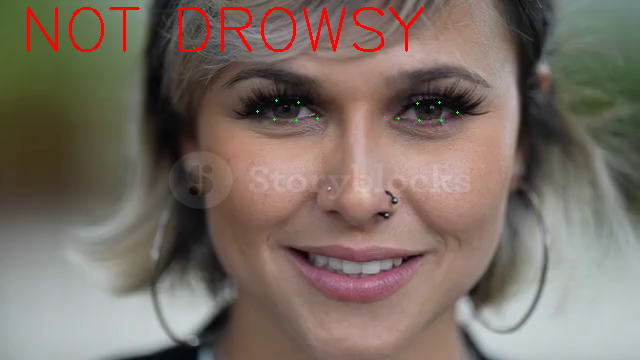

In [10]:
# Load dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Function to extract a random frame from a video
def extract_random_frame(video_path):
    vidObj = cv2.VideoCapture(video_path)
    if not vidObj.isOpened():
        print(f"Error: Could not open video file at path: {video_path}")
        return None
    total_frames = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
    random_frame = random.randint(0, total_frames - 1)
    vidObj.set(cv2.CAP_PROP_POS_FRAMES, random_frame)
    success, image = vidObj.read()
    if success and image is not None:
        return image
    else:
        print("Failed to extract a random frame.")
        return None

def eye_aspect_ratio(eye):
    # compute the euclidean distances between the vertical eye landmarks
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])

    # compute the euclidean distance between the horizontal eye landmark
    C = np.linalg.norm(eye[0] - eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    return ear

def detect_faces(video_path):
    model = get_model("resnet50_2020-07-20", max_size=2048)
    model.eval()

    image = extract_random_frame(video_path)
    if image is None:
        print("Error: Could not extract a random frame from the video.")
        return

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dets = detector(image_gray, 1)  # dlib's face detector
    for det in dets:
        shape = predictor(image_gray, det)
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])

        # Assuming indices for eyes are known: left eye (36 to 41), right eye (42 to 47)
        left_eye = landmarks[36:42]
        right_eye = landmarks[42:48]
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Draw the eyes on the frame
        for (x, y) in landmarks[36:48]:
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

        # Check if EAR is below a threshold, here assumed to be 0.25 for demonstration
        if ear < 0.25:
            cv2.putText(image, "DROWSY", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
        if ear > 0.25:
            cv2.putText(image, "NOT DROWSY", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)


    cv2_imshow(image)

video_path = "/content/Video1.mp4"

# Execute face detection
detect_faces(video_path)